In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv").head(1500).sort_values(['state'])

C:\Users\derek\AppData\Local\Temp\ipykernel_16568\1762180571.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv").head(1500).sort_values(['state'])


In [4]:
data.columns.values.tolist()

['hospital_pk',
 'collection_week',
 'state',
 'ccn',
 'hospital_name',
 'address',
 'city',
 'zip',
 'hospital_subtype',
 'fips_code',
 'is_metro_micro',
 'total_beds_7_day_avg',
 'all_adult_hospital_beds_7_day_avg',
 'all_adult_hospital_inpatient_beds_7_day_avg',
 'inpatient_beds_used_7_day_avg',
 'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
 'inpatient_beds_used_covid_7_day_avg',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
 'inpatient_beds_7_day_avg',
 'total_icu_beds_7_day_avg',
 'total_staffed_adult_icu_beds_7_day_avg',
 'icu_beds_used_7_day_avg',
 'staffed_adult_icu_bed_occupancy_7_day_avg',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
 'staffed_icu_adult_patients_confirmed_covid_7_day_avg',
 'total_p

## Data Processing for State

In [5]:
sliced = data[['inpatient_beds_used_covid_7_day_sum', 'total_beds_7_day_sum', 'all_pediatric_inpatient_beds_7_day_sum', 'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_coverage']]
sliced

,inpatient_beds_used_covid_7_day_sum,total_beds_7_day_sum,all_pediatric_inpatient_beds_7_day_sum,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_coverage
1354,NaN,11.0,NaN,0
227,NaN,707.0,NaN,0
1353,45.0,954.0,NaN,0
806,0.0,100.0,NaN,0
1112,0.0,60.0,NaN,0
...,...,...,...,...
1345,0.0,343.0,NaN,0
1342,0.0,104.0,NaN,0
1343,18.0,534.0,NaN,0
217,51.0,1128.0,NaN,0


In [6]:
sliced['inpatient_beds_used_covid_7_day_sum'].isna().sum()
(sliced['inpatient_beds_used_covid_7_day_sum'] < 0).sum()

def ifZero(x):
    if x < 0:
        return 0
    return x

In [7]:
psliced = sliced['inpatient_beds_used_covid_7_day_sum'].dropna().apply(ifZero)
psliced

1353    45.0
806      0.0
1112     0.0
564     24.0
561     33.0
        ... 
1345     0.0
1342     0.0
1343    18.0
217     51.0
1344     0.0
Name: inpatient_beds_used_covid_7_day_sum, Length: 1401, dtype: float64

In [8]:
ptotal_beds = sliced['total_beds_7_day_sum'].dropna().apply(ifZero)
ptotal_beds

1354      11.0
227      707.0
1353     954.0
806      100.0
1112      60.0
         ...  
1345     343.0
1342     104.0
1343     534.0
217     1128.0
1344     175.0
Name: total_beds_7_day_sum, Length: 1101, dtype: float64

In [9]:
pdf = psliced.to_frame().join(ptotal_beds)
pdf

,inpatient_beds_used_covid_7_day_sum,total_beds_7_day_sum
1353,45.0,954.0
806,0.0,100.0
1112,0.0,60.0
564,24.0,864.0
561,33.0,889.0
...,...,...
1345,0.0,343.0
1342,0.0,104.0
1343,18.0,534.0
217,51.0,1128.0


Determine if there are linear correlations?

In [10]:
y = np.array(pdf['inpatient_beds_used_covid_7_day_sum'])
y

array([45.,  0.,  0., ..., 18., 51.,  0.])

In [16]:
X_1 = np.array(pdf['total_beds_7_day_sum'])
X_1 = np.log(X_1)

C:\Users\derek\AppData\Local\Temp\ipykernel_16568\2715823183.py:2: RuntimeWarning: divide by zero encountered in log
  X_1 = np.log(X_1)


## Logorithmic relationship between X_1 and y

C:\Users\derek\AppData\Local\Temp\ipykernel_16568\336350411.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(X_1, np.log(y))


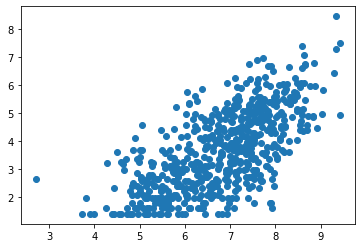

In [20]:
plt.scatter(X_1, np.log(y))